In [87]:
import pandas as pd

In [88]:
data = pd.read_csv("diabetes.csv")

In [89]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [91]:
# Step 1: Data loading and preprocessing
X = data.iloc[:,:-1].values
y = data["Outcome"].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [92]:
from sklearn.preprocessing import StandardScaler
# Normalize features
scaler = StandardScaler()

In [93]:
X = scaler.fit_transform(X)
X.shape, y.shape

((768, 8), (768,))

In [94]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [95]:
import torch
X_train_tensor = torch.from_numpy(X_train).type(torch.float)
X_test_tensor = torch.from_numpy(X_test).type(torch.float)
y_train_tensor = torch.from_numpy(y_train).type(torch.float)
y_test_tensor = torch.from_numpy(y_test).type(torch.float)
# X_train_tensor, X_test_tensor
# X_train_tensor.dtype
y_train_tensor.shape

torch.Size([614])

In [96]:
from torch.utils.data import DataLoader, TensorDataset
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle= False)



In [101]:
import torch.nn as nn
# Step 2: Define the model
class DiabetesClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(8,16)
    self.fc2 = nn.Linear(16,16)
    self.fc3 = nn.Linear(16,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    X = self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))
    return X

model = DiabetesClassifier()

In [102]:
import torch.optim as optim
# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr =0.001)

In [103]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

In [104]:
# Step 4: Train the Model

num_epochs = 100
for epoch in range(num_epochs):
  model.train()
  epoch_loss = 0
  epoch_out_label = torch.empty(0)
  epoch_y_batch = torch.empty(0)
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch).squeeze()
    out_label = torch.round(torch.sigmoid(outputs))
    loss = criterion(outputs, y_batch)
    epoch_loss += loss.item()
    loss.backward()
    optimizer.step()
    epoch_out_label = torch.cat((epoch_out_label, out_label))
    epoch_y_batch = torch.cat((epoch_y_batch, y_batch))
  acc = accuracy_fn(epoch_out_label,epoch_y_batch)
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test_tensor).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = criterion(test_logits,y_test_tensor)
    test_acc = accuracy_fn(test_pred,y_test_tensor)
  if epoch % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}],Loss: {epoch_loss:.4f},Test acc: {test_acc:.2f}')

Epoch [1/100],Loss: 14.3513,Test acc: 48.70
Epoch [11/100],Loss: 9.4494,Test acc: 75.97
Epoch [21/100],Loss: 9.3032,Test acc: 75.97
Epoch [31/100],Loss: 8.8363,Test acc: 77.27
Epoch [41/100],Loss: 8.3615,Test acc: 77.27
Epoch [51/100],Loss: 8.1865,Test acc: 77.27
Epoch [61/100],Loss: 8.5787,Test acc: 77.92
Epoch [71/100],Loss: 8.1456,Test acc: 77.92
Epoch [81/100],Loss: 8.3054,Test acc: 77.27
Epoch [91/100],Loss: 8.4806,Test acc: 77.92


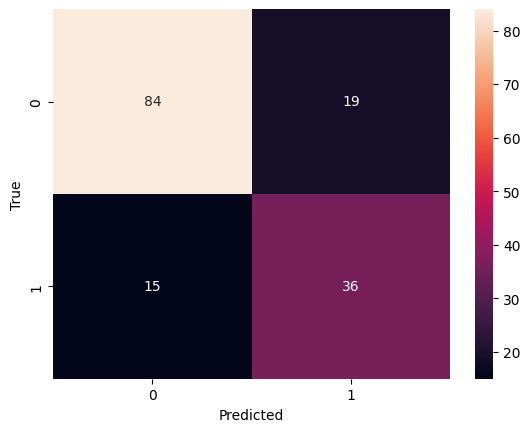

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Plot Confusion Matrix
sns.heatmap(confusion_matrix(test_pred, y_test_tensor), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()